In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from scipy import stats

In [5]:
def findID(filename):
  temp = filename.find('_I')
  filename = filename[temp+1:]
  return filename

def findDiff(fs, aq):
  
  vol_diff = pd.DataFrame(columns = ['Filename', 'left_cerebral_white_matter', 'left_lateral_ventricle',
          'left_cerebellum_white_matter', 'left_cerebellum_cortex',
          'left_thalamus_proper', 'left_caudate', 'left_putamen', 'left_pallidum',
          '3rd_ventricle', '4th_ventricle', 'left_hippocampus', 'left_amygdala',
          'left_accumbens_area', 'left_ventraldc', 'right_cerebral_white_matter',
          'right_lateral_ventricle', 'right_cerebellum_white_matter',
          'right_cerebellum_cortex', 'right_thalamus_proper', 'right_caudate',
          'right_putamen', 'right_pallidum', 'right_hippocampus',
          'right_amygdala', 'right_accumbens_area', 'right_ventraldc'])

    file_fs = fs.loc[ :, ['Filename','left_cerebral_white_matter', 'left_lateral_ventricle',
          'left_cerebellum_white_matter', 'left_cerebellum_cortex',
          'left_thalamus_proper', 'left_caudate', 'left_putamen', 'left_pallidum',
          '3rd_ventricle', '4th_ventricle', 'left_hippocampus', 'left_amygdala',
          'left_accumbens_area', 'left_ventraldc', 'right_cerebral_white_matter',
          'right_lateral_ventricle', 'right_cerebellum_white_matter',
          'right_cerebellum_cortex', 'right_thalamus_proper', 'right_caudate',
          'right_putamen', 'right_pallidum', 'right_hippocampus',
          'right_amygdala', 'right_accumbens_area', 'right_ventraldc']]

    file_aq = aq.loc[ :, ['Filename','left_cerebral_white_matter', 'left_lateral_ventricle',
          'left_cerebellum_white_matter', 'left_cerebellum_cortex',
          'left_thalamus_proper', 'left_caudate', 'left_putamen', 'left_pallidum',
          '3rd_ventricle', '4th_ventricle', 'left_hippocampus', 'left_amygdala',
          'left_accumbens_area', 'left_ventraldc', 'right_cerebral_white_matter',
          'right_lateral_ventricle', 'right_cerebellum_white_matter',
          'right_cerebellum_cortex', 'right_thalamus_proper', 'right_caudate',
          'right_putamen', 'right_pallidum', 'right_hippocampus',
          'right_amygdala', 'right_accumbens_area', 'right_ventraldc']]

  file_fs = file_fs.set_index('Filename')
  file_aq = file_aq.set_index('Filename')
  #print(file_fs)
  #print(file_aq)

  filelist = []
  for filename_fs in file_fs.index:
    fs_id = findID(filename_fs)
    fs_id = fs_id[:-4]
    #print("fs_id = " ,fs_id)
    for filename_aq in file_aq.index:
      aq_id = findID(filename_aq)
    
      #print("aq_id = ",aq_id)
      if fs_id == aq_id:
        #print(aq_id)
        #print(filename_fs)
        filelist.append(filename_aq)

        fs_vol = file_fs.loc[filename_fs]
        aq_vol = file_aq.loc[filename_aq] * 10**3
             
        vol_diff = vol_diff.append(aq_vol.subtract(fs_vol), ignore_index=True)
        break
        #print(vol_diff)
    
    vol_diff['Filename'] = filelist
  return vol_diff


In [6]:
def findAvg(filename):

  new_df = pd.DataFrame(columns = ['left_cerebral_white_matter', 'left_lateral_ventricle',
          'left_cerebellum_white_matter', 'left_cerebellum_cortex',
          'left_thalamus_proper', 'left_caudate', 'left_putamen', 'left_pallidum',
          '3rd_ventricle', '4th_ventricle', 'left_hippocampus', 'left_amygdala',
          'left_accumbens_area', 'left_ventraldc', 'right_cerebral_white_matter',
          'right_lateral_ventricle', 'right_cerebellum_white_matter',
          'right_cerebellum_cortex', 'right_thalamus_proper', 'right_caudate',
          'right_putamen', 'right_pallidum', 'right_hippocampus',
          'right_amygdala', 'right_accumbens_area', 'right_ventraldc'])


  avg_list = []

  for col in filename.columns:
    avg = filename[col].mean()
    avg_list.append(avg)

  new_df.loc[0] = avg_list

  #new_df1 = new_df.transpose()
  # AQUA
  print(new_df)
  return new_df

In [7]:
file_fs = pd.read_csv('freesurfer_data(edited).csv')
file_aq = pd.read_csv('aqua_volume.csv')

print(file_fs)
vol_diff = findDiff(file_fs, file_aq)

vol_diff.to_csv('0000.csv')
#files.download('012_S_0689_AD.csv')

#print(vol_diff)


                                               Filename   SubjectID  \
0     ADNI_002_S_0295_MPR__GradWarp__B1_Correction__...  002_S_0295   
1     ADNI_002_S_0295_MPR__GradWarp__B1_Correction__...  002_S_0295   
2     ADNI_002_S_0295_MPR__GradWarp__B1_Correction__...  002_S_0295   
3     ADNI_002_S_0295_MPR__GradWarp__B1_Correction__...  002_S_0295   
4     ADNI_002_S_0295_MPR__GradWarp__B1_Correction__...  002_S_0295   
...                                                 ...         ...   
2243  ADNI_941_S_1202_MPR-R__GradWarp__B1_Correction...  941_S_1202   
2244  ADNI_941_S_1202_MPR__GradWarp__B1_Correction__...  941_S_1202   
2245  ADNI_941_S_1311_MPR-R__GradWarp__B1_Correction...  941_S_1311   
2246  ADNI_941_S_1311_MPR__GradWarp__B1_Correction__...  941_S_1311   
2247  ADNI_941_S_1311_MPR__GradWarp__B1_Correction__...  941_S_1311   

                  Visit Group      Age Sex MMSE GDSCALE  CDR NPI-Q  ...  \
0        ADNI Screening    CN  84.9041   M   28       1    0  None  ... 

In [19]:
diff_vol = pd.read_csv('volume_difference.csv')
diff_vol = diff_vol.set_index('Filename')

df = pd.DataFrame(columns = ['left_cerebral_white_matter', 'left_lateral_ventricle',
       'left_cerebellum_white_matter', 'left_cerebellum_cortex',
       'left_thalamus_proper', 'left_caudate', 'left_putamen', 'left_pallidum',
       '3rd_ventricle', '4th_ventricle', 'left_hippocampus', 'left_amygdala',
       'left_accumbens_area', 'left_ventraldc', 'right_cerebral_white_matter',
       'right_lateral_ventricle', 'right_cerebellum_white_matter',
       'right_cerebellum_cortex', 'right_thalamus_proper', 'right_caudate',
       'right_putamen', 'right_pallidum', 'right_hippocampus',
       'right_amygdala', 'right_accumbens_area', 'right_ventraldc'])

data_sum = []
data_std = []
#print(avg_vol)
for columns in diff_vol:
    sum1 = diff_vol[columns].sum()
    std1 = diff_vol[columns].std()
    
    #print(columns)
    data_sum.append(sum1)
    data_std.append(std1)
    
df.loc[0] = data_sum
df.to_csv('0000.csv')
print(df)
#print(avg_vol)
print(data_std)

   left_cerebral_white_matter  left_lateral_ventricle  \
0               -3.666748e+07            1.740659e+06   

   left_cerebellum_white_matter  left_cerebellum_cortex  left_thalamus_proper  \
0                 -1.373374e+06           229670.374178         531650.037342   

    left_caudate   left_putamen  left_pallidum  3rd_ventricle  4th_ventricle  \
0 -450090.343527  725799.947628 -223119.719494  328610.842045 -266477.191668   

   ...  right_cerebellum_white_matter  right_cerebellum_cortex  \
0  ...                  -2.319784e+06             1.311174e+06   

   right_thalamus_proper  right_caudate  right_putamen  right_pallidum  \
0          404354.243188 -462624.440636  377337.359951    27149.077182   

   right_hippocampus  right_amygdala  right_accumbens_area  right_ventraldc  
0       381438.96168   327971.016703         168046.445675    -34514.037855  

[1 rows x 26 columns]
[11446.219214041503, 708.5657270983456, 976.799427969969, 1563.852497094721, 402.01321349687146, 383

                                          0
left_cerebral_white_matter    -3.666748e+07
left_lateral_ventricle         1.740659e+06
left_cerebellum_white_matter  -1.373374e+06
left_cerebellum_cortex         2.296704e+05
left_thalamus_proper           5.316500e+05
left_caudate                  -4.500903e+05
left_putamen                   7.257999e+05
left_pallidum                 -2.231197e+05
3rd_ventricle                  3.286108e+05
4th_ventricle                 -2.664772e+05
left_hippocampus               2.795237e+05
left_amygdala                  2.409529e+05
left_accumbens_area            9.529508e+04
left_ventraldc                -2.240059e+04
right_cerebral_white_matter   -3.176017e+07
right_lateral_ventricle        2.586951e+06
right_cerebellum_white_matter -2.319784e+06
right_cerebellum_cortex        1.311174e+06
right_thalamus_proper          4.043542e+05
right_caudate                 -4.626244e+05
right_putamen                  3.773374e+05
right_pallidum                 2

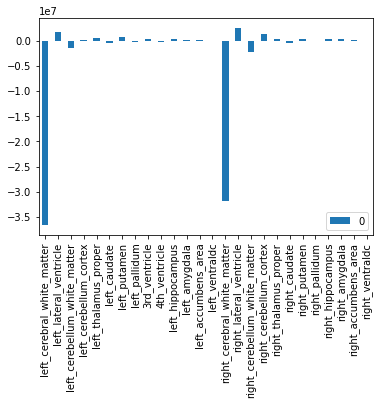

In [20]:
df = df.transpose()
print(df)
df.plot.bar(yerr=data_std)